In [1]:
import json
from pybbn.graph.dag import Bbn
from pybbn.pptc.inferencecontroller import InferenceController
from pybbn.graph.jointree import EvidenceBuilder
import random
import time

def get_jt():
    with open('multi-bbn.json', 'r') as f:
        bbn = Bbn.from_dict(json.loads(f.read()))
        jt = InferenceController.apply(bbn)
        return jt
    
def get_evidence(name, val):
    return EvidenceBuilder() \
        .with_node(jt.get_bbn_node_by_name(name)) \
        .with_evidence(val, 1.0) \
        .build()
    
def get_evidences():
    max_nodes = random.randint(1, 20)
    
    ids = list(node_ids)
    random.shuffle(ids)
    
    ids = ids[:max_nodes]
    ids = {i: random.choice(['state0', 'state1']) for i in ids}
    ids = [get_evidence(n, v) for n, v in ids.items()]
    
    return ids

def do_inference():
    evidences = get_evidences()
    
    start = time.time()
    jt.unobserve_all()
    jt.update_evidences(evidences)
    
    stop = time.time()
    diff = stop - start
    
    return len(evidences), diff
    
node_ids = [f'{n}' for n in range(900)]

In [2]:
jt = get_jt()

In [3]:
import pandas as pd

df = pd.DataFrame([do_inference() for _ in range(1_000)], columns=['n', 'time'])
df.shape

(1000, 2)

In [4]:
df.head(10)

,n,time
0,19,0.115872
1,12,0.218144
2,8,0.273617
3,8,0.223622
4,12,0.220451
5,14,0.220096
6,15,0.226273
7,14,0.260537
8,18,0.223442
9,13,0.219249


In [5]:
df.mean()

n       10.671000
time     0.238939
dtype: float64

<AxesSubplot:xlabel='n', ylabel='time'>

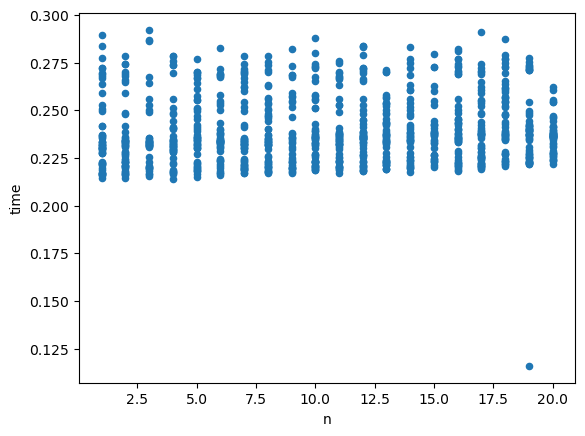

In [6]:
df.plot(kind='scatter', x='n', y='time')

In [7]:
from sklearn.linear_model import LinearRegression

X = df[['n']]
y = df['time']

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(0.23674527857556954, array([0.00020554]))